#Notes
What is a false positive, what is false negative, which is worse and why?


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score
# from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
RANDOM_STATE = 42

In [16]:
def performance(y_true, y_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    From Regression Trees and Model Optimization - Lab
    """

    f1 = f1_score(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    roc_auc = roc_auc_score(y_true, y_predict)

    return [f1, rmse, roc_auc]
def get_score(model, x_train, x_test, y_train, y_test):
    """
    Returns score from any given model and train test split data
    """
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = performance(y_test, y_pred)
    return score
def plot_score(parameter, parameter_name, mse_results, f1_results, roc_auc_results):
    """
    Plots score given a parameter, parameter_name and their results.
    Original code from Hyperparameter tuning - Lab
    """
    plt.figure(figsize=(12, 6))
    plt.plot(parameter, f1_results, 'b', label='f1')
    plt.xlabel(parameter_name)
    plt.ylabel('f1-score')
    plt.legend()
    plt.show()
    plt.figure(figsize=(12, 6))
    plt.plot(parameter, mse_results, 'r', label='RMSE')
    plt.xlabel(parameter_name)
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    plt.figure(figsize=(12, 6))
    plt.plot(parameter, roc_auc_results, 'g', label='ROC AUC')
    plt.xlabel(parameter_name)
    plt.ylabel('ROC AUC')
    plt.legend()
    plt.show()

In [3]:
df = pd.read_csv('../Data/processed_varibles.csv')
target = pd.read_csv('../Data/processed_target.csv')

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df, target, random_state=RANDOM_STATE, test_size=.2)

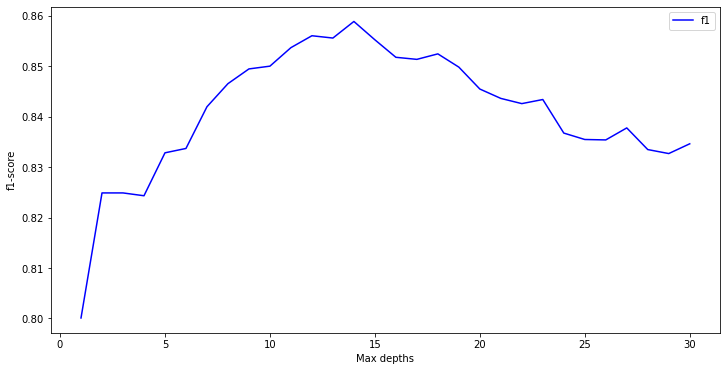

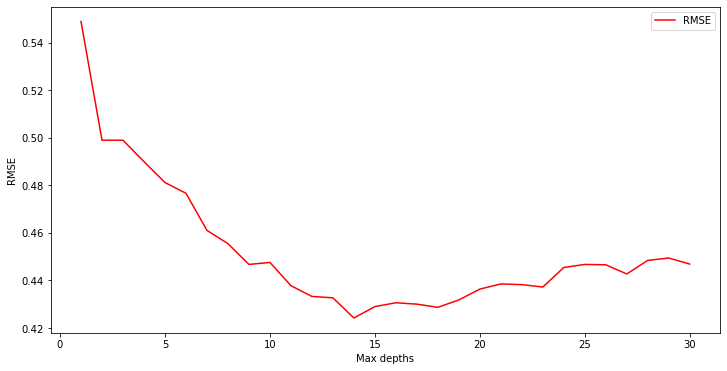

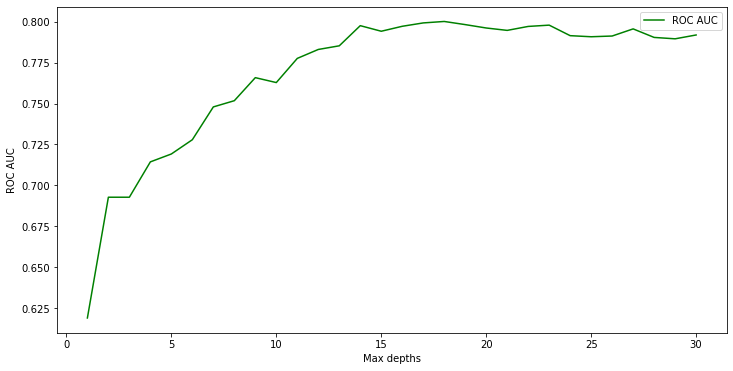

In [17]:
max_depths = np.linspace(1,30,30)
p_name = 'Max depths'
mse_results = []
f1_results = []
roc_auc_results = []
for max_depth in max_depths:
    classifier = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=max_depth)
    score = get_score(classifier, x_train, x_test, y_train, y_test)
    f1_results.append(score[0])
    mse_results.append(score[1])
    roc_auc_results.append(score[2])
plot_score(max_depths, p_name, mse_results, f1_results, roc_auc_results)

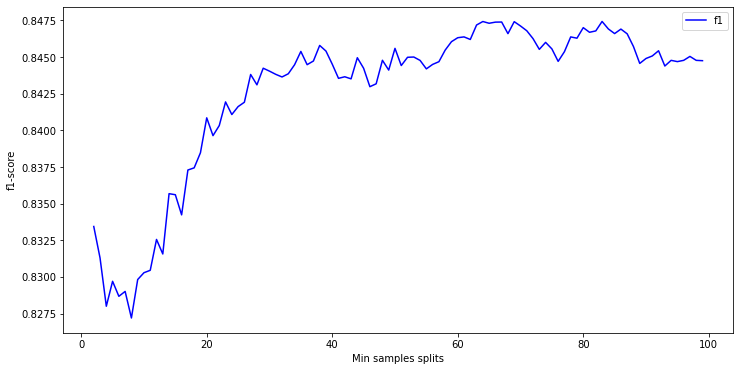

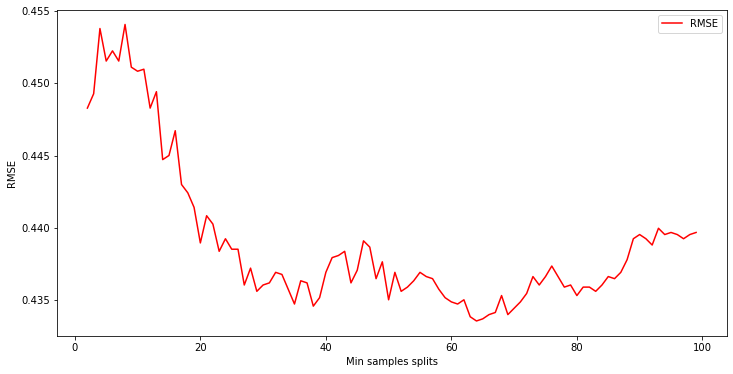

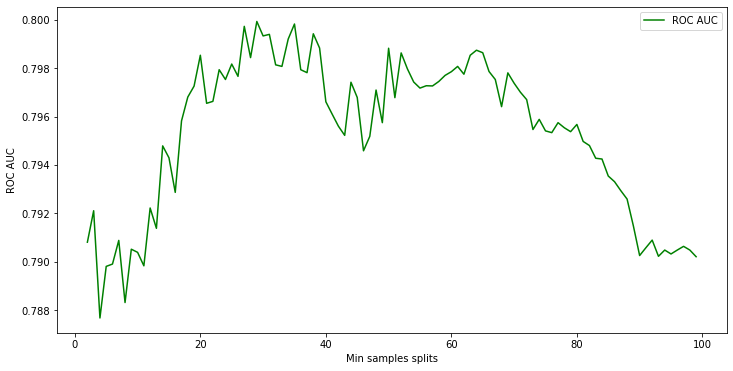

In [18]:
min_samples_splits = np.arange(2, 100)
p_name = 'Min samples splits'
mse_results = []
f1_results = []
roc_auc_results = []
for min_samples_split in min_samples_splits:
    classifier = DecisionTreeClassifier(random_state=RANDOM_STATE, min_samples_split=min_samples_split)
    score = get_score(classifier, x_train, x_test, y_train, y_test)
    f1_results.append(score[0])
    mse_results.append(score[1])
    roc_auc_results.append(score[2])
plot_score(min_samples_splits, p_name, mse_results, f1_results, roc_auc_results)

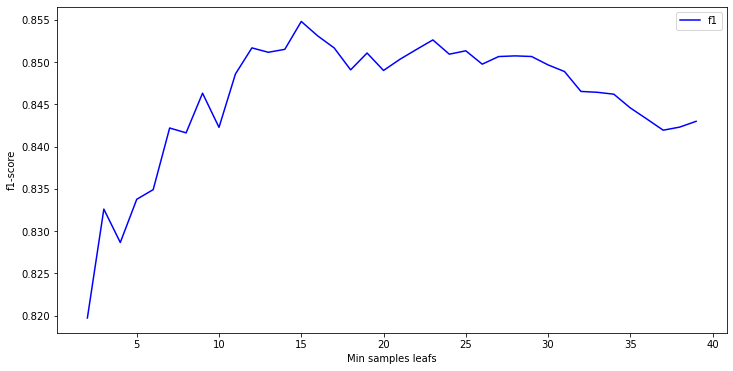

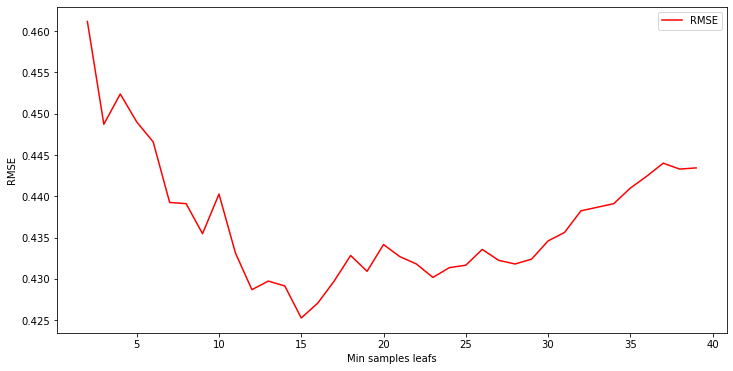

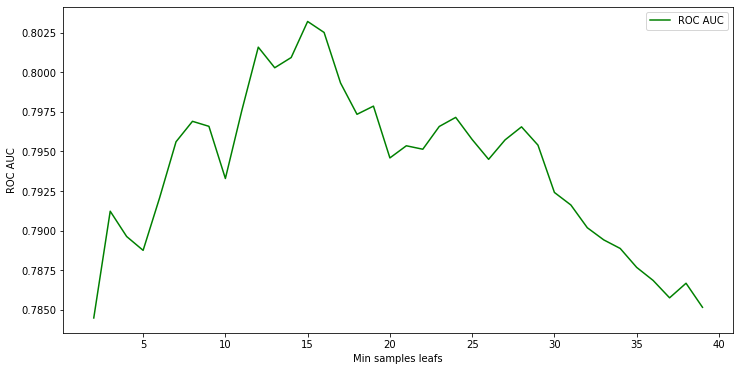

In [19]:
min_samples_leafs = np.arange(2,40)
p_name = 'Min samples leafs'
mse_results = []
f1_results = []
roc_auc_results = []
for min_samples_leaf in min_samples_leafs:
    classifier = DecisionTreeClassifier(random_state=RANDOM_STATE, min_samples_leaf=min_samples_leaf)
    score = get_score(classifier, x_train, x_test, y_train, y_test)
    f1_results.append(score[0])
    mse_results.append(score[1])
    roc_auc_results.append(score[2])
plot_score(min_samples_leafs, p_name, mse_results, f1_results, roc_auc_results)

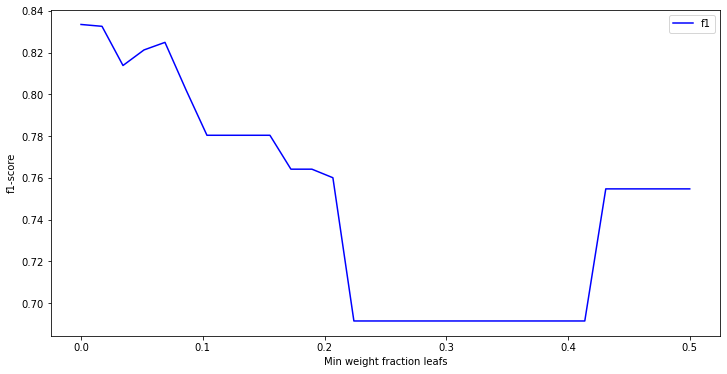

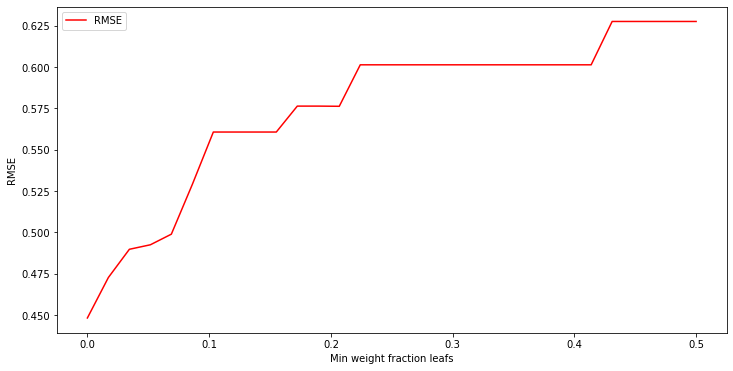

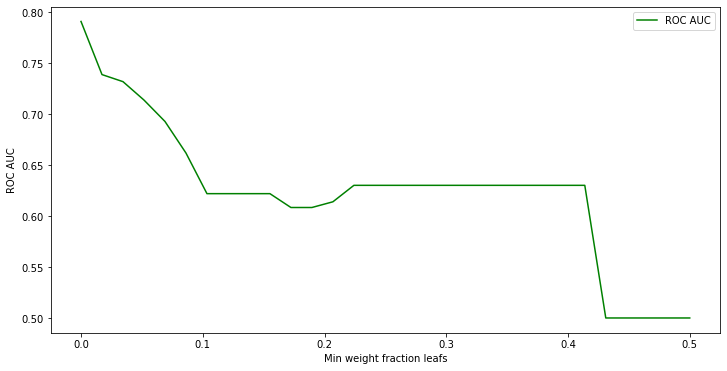

In [20]:
min_weight_fraction_leafs = np.linspace(0,.5,30)
p_name = 'Min weight fraction leafs'
mse_results = []
f1_results = []
roc_auc_results = []
for min_weight_fraction_leaf in min_weight_fraction_leafs:
    classifier = DecisionTreeClassifier(random_state=RANDOM_STATE, min_weight_fraction_leaf=min_weight_fraction_leaf)
    score = get_score(classifier, x_train, x_test, y_train, y_test)
    f1_results.append(score[0])
    mse_results.append(score[1])
    roc_auc_results.append(score[2])
plot_score(min_weight_fraction_leafs, p_name, mse_results, f1_results, roc_auc_results)

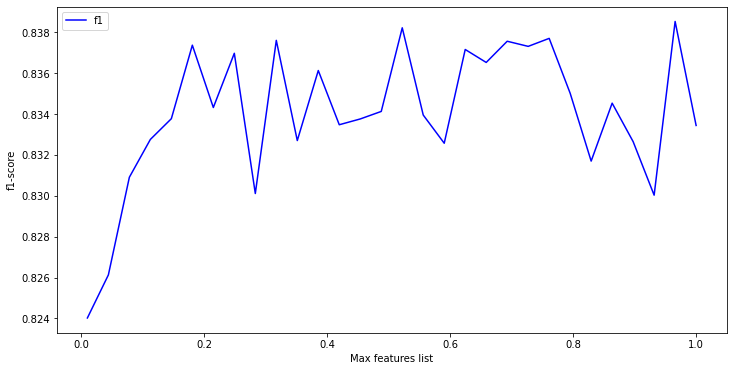

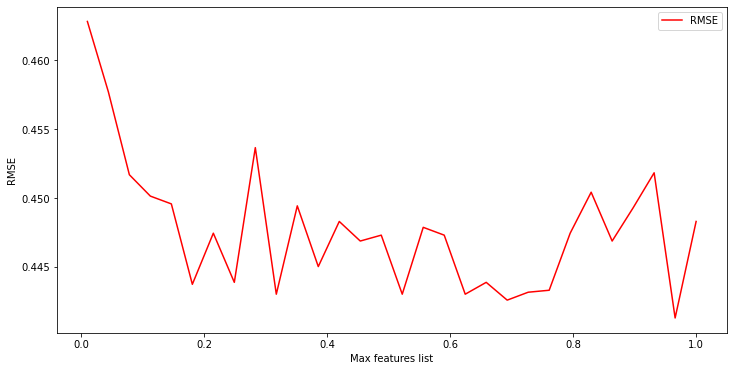

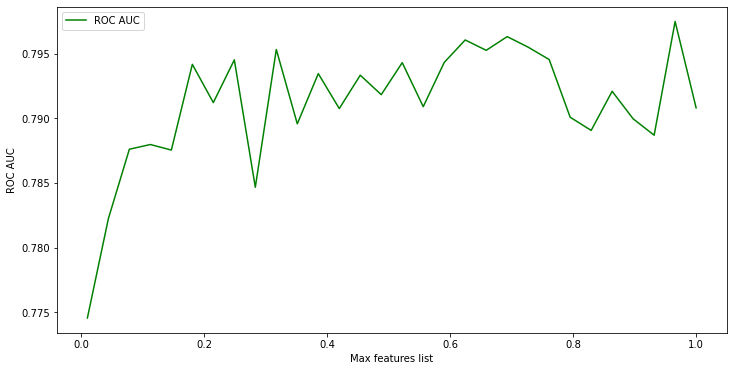

In [21]:
max_features_list = np.linspace(.01,1,30)
p_name = 'Max features list'
mse_results = []
f1_results = []
roc_auc_results = []
for max_features in max_features_list:
    classifier = DecisionTreeClassifier(random_state=RANDOM_STATE, max_features=max_features)
    score = get_score(classifier, x_train, x_test, y_train, y_test)
    f1_results.append(score[0])
    mse_results.append(score[1])
    roc_auc_results.append(score[2])
plot_score(max_features_list, p_name, mse_results, f1_results, roc_auc_results)

In [20]:
classifier = DecisionTreeClassifier(random_state=RANDOM_STATE, max_features='log2')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
score = performance(y_test, y_pred)

In [21]:
score

[0.8299061478435095, 0.4532387553295218, 0.7858811188112819]

In [26]:
model = LogisticRegression(random_state=RANDOM_STATE)
model.fit(x_train, y_train)
y_preds = model.predict(x_test)
score = get_score(model, x_train, x_test, y_train, y_test)
score

C:\Users\helde\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\helde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\helde\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

[0.7695935112703951, 0.5577911096979534, 0.6435014447076538]

In [ ]:
get_score()